# Detección de pose
 ![marcadores](pose_landmarks.png)

In [9]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 8]    # incrementar tamaño de plots

MODEL_PATH = "models/pose_landmarker_lite.task"
base_options = python.BaseOptions(model_asset_path=MODEL_PATH)
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)


I0000 00:00:1717811285.224877 11095273 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M1 Pro
W0000 00:00:1717811285.307834 11097615 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1717811285.311910 11097615 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [10]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  # remove alpha channel
  if rgb_image.shape[-1] > 3:
    rgb_image = rgb_image[:, :, :3]
  
  annotated_image = np.copy(rgb_image)

  print(rgb_image.shape)
  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

In [11]:
def display_color_row(*imgs):
    for i, img in enumerate(imgs):
        print(type(img), img.dtype, img[0,0])
        plt.subplot(1, len(imgs), i + 1)
        plt.imshow(img)
        plt.title(f"{i}")
        plt.xticks([])
        plt.yticks([])

/opt/miniconda3/envs/cv_unifranz/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


(599, 735, 3)
<class 'numpy.ndarray'> uint8 [ 2 15 43]


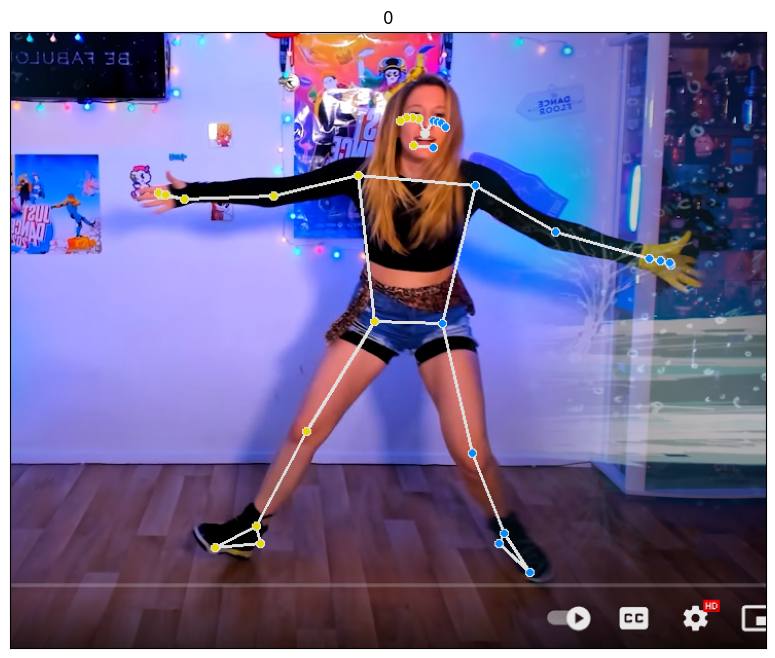

In [17]:
image = mp.Image.create_from_file("baile.png")

detection_result = detector.detect(image)

annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)


display_color_row(annotated_image)

In [18]:
detection_result.pose_landmarks[0]

[NormalizedLandmark(x=0.5496509671211243, y=0.1638343334197998, z=-0.9603254199028015, visibility=0.9999985694885254, presence=0.999995231628418),
 NormalizedLandmark(x=0.5600340366363525, y=0.14510810375213623, z=-0.9451117515563965, visibility=0.9999949932098389, presence=0.9999842643737793),
 NormalizedLandmark(x=0.5650995969772339, y=0.14609235525131226, z=-0.9451112747192383, visibility=0.999993085861206, presence=0.9999829530715942),
 NormalizedLandmark(x=0.5701043009757996, y=0.14697015285491943, z=-0.9450910091400146, visibility=0.9999933242797852, presence=0.99997878074646),
 NormalizedLandmark(x=0.5404741764068604, y=0.1411583125591278, z=-0.9496046304702759, visibility=0.9999955892562866, presence=0.9999860525131226),
 NormalizedLandmark(x=0.5323823690414429, y=0.14013835787773132, z=-0.9499055743217468, visibility=0.9999942779541016, presence=0.9999868869781494),
 NormalizedLandmark(x=0.5251637101173401, y=0.13944044709205627, z=-0.9499220848083496, visibility=0.99999487400

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


<class 'numpy.ndarray'> uint8 [  2  15  43 255]
<class 'numpy.ndarray'> float32 [0. 0. 0.]


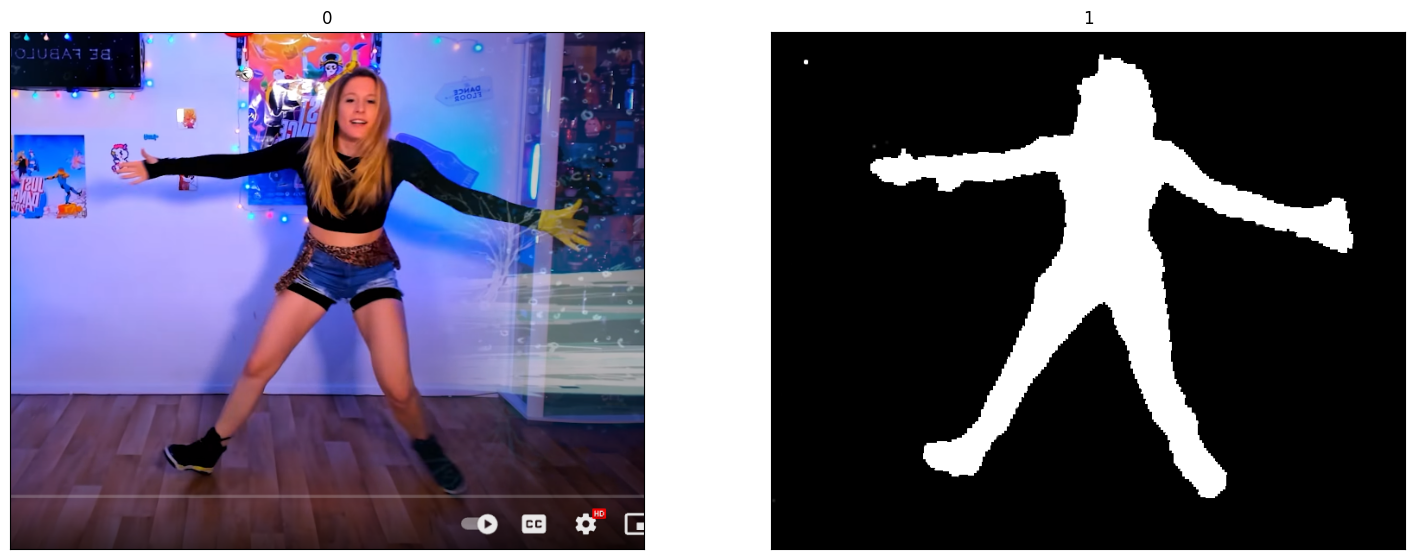

In [19]:
segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
display_color_row(image.numpy_view(), visualized_mask)